## Cart Pole

In [29]:
import gymnasium as gym
import torch
import torch.nn as nn
import torch.optim as optim
import numpy as np
import matplotlib.pyplot as plt

In [30]:
class PolicyNetwork(nn.Module):
    def __init__(self, input_dim, output_dim):
        super(PolicyNetwork, self).__init__()
        self.network = nn.Sequential(
            nn.Linear(input_dim, 128),
            nn.ReLU(),
            nn.Linear(128, output_dim),
            nn.Softmax(dim=-1)
        )

    def forward(self, x):
        return self.network(x)

In [31]:
class REINFORCE:
    def __init__(self, policy_network, lr=0.01, gamma=0.99):
        self.policy_network = policy_network
        self.optimizer = optim.Adam(self.policy_network.parameters(), lr=lr)
        self.gamma = gamma

    def compute_returns(self, rewards):
        returns = []
        G = 0
        for reward in reversed(rewards):
            G = reward + self.gamma * G
            returns.insert(0, G)
        return returns

    def update_policy(self, log_probs, rewards):
        returns = self.compute_returns(rewards)
        returns = torch.tensor(returns)
        loss = 0

        for log_prob, G in zip(log_probs, returns):
            loss -= log_prob * G

        self.optimizer.zero_grad()
        loss.backward()
        self.optimizer.step()

In [32]:
env = gym.make('CartPole-v1')
input_dim = env.observation_space.shape[0]
output_dim = env.action_space.n

policy_network = PolicyNetwork(input_dim, output_dim)
agent = REINFORCE(policy_network)

num_episodes = 100
rewards = []

for episode in range(num_episodes):
    obs = env.reset()[0]
    log_probs = []
    rewards_episode = []
    done = False

    while not done:
        obs_tensor = torch.tensor(obs, dtype=torch.float32)
        action_probs = policy_network(obs_tensor)
        action = torch.multinomial(action_probs, 1).item()

        log_prob = torch.log(action_probs[action])
        log_probs.append(log_prob)

        obs, reward, done, _, _ = env.step(action)
        rewards_episode.append(reward)

    agent.update_policy(log_probs, rewards_episode)
    total_reward = sum(rewards_episode)
    rewards.append(total_reward)
    print(f"Episode {episode + 1}/{num_episodes}: Reward = {total_reward}")

Episode 1/100: Reward = 13.0
Episode 2/100: Reward = 32.0
Episode 3/100: Reward = 14.0
Episode 4/100: Reward = 12.0
Episode 5/100: Reward = 18.0
Episode 6/100: Reward = 12.0
Episode 7/100: Reward = 13.0
Episode 8/100: Reward = 10.0
Episode 9/100: Reward = 40.0
Episode 10/100: Reward = 12.0
Episode 11/100: Reward = 15.0
Episode 12/100: Reward = 13.0
Episode 13/100: Reward = 15.0
Episode 14/100: Reward = 35.0
Episode 15/100: Reward = 11.0
Episode 16/100: Reward = 17.0
Episode 17/100: Reward = 71.0
Episode 18/100: Reward = 16.0
Episode 19/100: Reward = 18.0
Episode 20/100: Reward = 24.0
Episode 21/100: Reward = 23.0
Episode 22/100: Reward = 12.0
Episode 23/100: Reward = 32.0
Episode 24/100: Reward = 27.0
Episode 25/100: Reward = 16.0
Episode 26/100: Reward = 40.0
Episode 27/100: Reward = 28.0
Episode 28/100: Reward = 81.0
Episode 29/100: Reward = 122.0
Episode 30/100: Reward = 45.0
Episode 31/100: Reward = 101.0
Episode 32/100: Reward = 33.0
Episode 33/100: Reward = 49.0
Episode 34/100: R

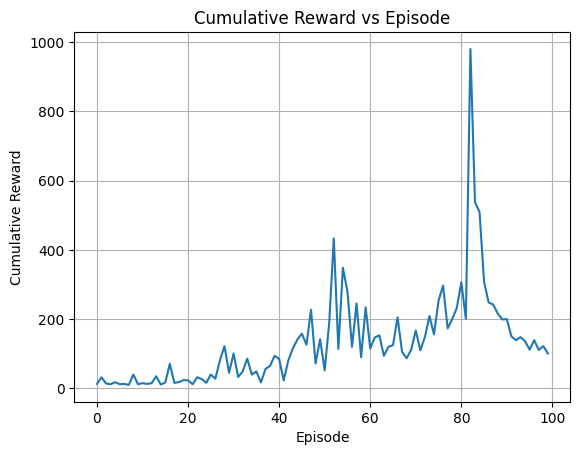

In [33]:
plt.plot(rewards)
plt.title("Cumulative Reward vs Episode")
plt.xlabel("Episode")
plt.ylabel("Cumulative Reward")
plt.grid(True)
plt.show()

In [34]:
env=gym.make('CartPole-v1',render_mode="human")
obs = env.reset()[0]
done = False

while not done:
    obs_tensor = torch.tensor(obs, dtype=torch.float32)
    action_probs = policy_network(obs_tensor)
    action = torch.argmax(action_probs).item()

    obs, reward, done, _, _ = env.step(action)
    env.render()

env.close()

## Lunar Lander

In [35]:
env = gym.make('LunarLander-v3')
input_dim = env.observation_space.shape[0]
output_dim = env.action_space.n

policy_network = PolicyNetwork(input_dim, output_dim)
agent = REINFORCE(policy_network)

num_episodes = 100
rewards = []

for episode in range(num_episodes):
    obs = env.reset()[0]
    log_probs = []
    rewards_episode = []
    done = False

    while not done:
        obs_tensor = torch.tensor(obs, dtype=torch.float32)
        action_probs = policy_network(obs_tensor)
        action = torch.multinomial(action_probs, 1).item()

        log_prob = torch.log(action_probs[action])
        log_probs.append(log_prob)

        obs, reward, done, _, _ = env.step(action)
        rewards_episode.append(reward)

    agent.update_policy(log_probs, rewards_episode)
    total_reward = sum(rewards_episode)
    rewards.append(total_reward)
    print(f"Episode {episode + 1}/{num_episodes}: Reward = {total_reward}")

Episode 1/100: Reward = -453.1789180356433
Episode 2/100: Reward = -163.41147152732262
Episode 3/100: Reward = -432.35205635918595
Episode 4/100: Reward = -87.11380440957754
Episode 5/100: Reward = -116.4519573090192
Episode 6/100: Reward = -360.9952177632009
Episode 7/100: Reward = -20.332696866290192
Episode 8/100: Reward = -230.9866619062592
Episode 9/100: Reward = -316.72338258132845
Episode 10/100: Reward = -444.91795281337926
Episode 11/100: Reward = -182.60743331012245
Episode 12/100: Reward = -236.25662720283614
Episode 13/100: Reward = -185.87704472896445
Episode 14/100: Reward = -124.16199601839746
Episode 15/100: Reward = -250.402647745142
Episode 16/100: Reward = -363.61444658959925
Episode 17/100: Reward = -150.0730454697185
Episode 18/100: Reward = -176.68958408759983
Episode 19/100: Reward = -258.8485758868193
Episode 20/100: Reward = -390.08065694682136
Episode 21/100: Reward = -416.79077669125803
Episode 22/100: Reward = -553.8000929227273
Episode 23/100: Reward = -290

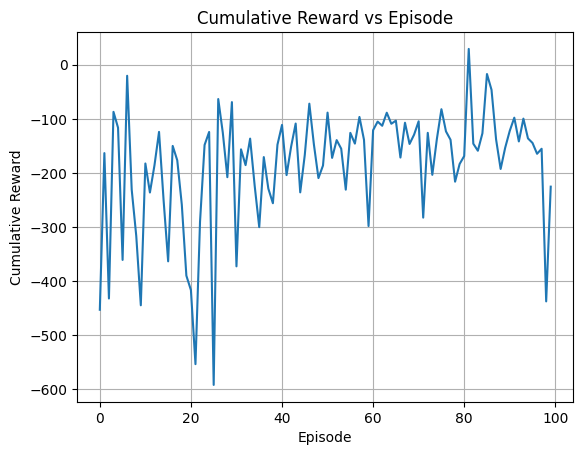

In [36]:
plt.plot(rewards)
plt.title("Cumulative Reward vs Episode")
plt.xlabel("Episode")
plt.ylabel("Cumulative Reward")
plt.grid(True)
plt.show()

In [37]:
env=gym.make('LunarLander-v3',render_mode="human")
obs = env.reset()[0]
done = False

while not done:
    obs_tensor = torch.tensor(obs, dtype=torch.float32)
    action_probs = policy_network(obs_tensor)
    action = torch.argmax(action_probs).item()

    obs, reward, done, _, _ = env.step(action)
    env.render()

env.close()